In [6]:
import sys
print(sys.version)

3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]


In [7]:
import opendatasets as od

In [8]:
readability_dataset_url = "https://www.kaggle.com/datasets/karthikudyawar/readability"

In [9]:
od.download(readability_dataset_url)

Skipping, found downloaded files in ".\readability" (use force=True to force download)


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("./readability/dataset.csv", encoding="utf-16 le")
df.head()

,color1,color2,readability
0,#BCE81D,#51598B,1
1,#3FBD0D,#159C0F,0
2,#8DDE7F,#3DFC05,0
3,#71C125,#E79106,0
4,#113089,#E378A0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   color1       1000 non-null   object
 1   color2       1000 non-null   object
 2   readability  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
readability,1000.0,0.125,0.330884,0.0,0.0,0.0,0.0,1.0


In [14]:
df.groupby("readability").count()

,color1,color2
readability,,
0,875,875
1,125,125


In [15]:
def hex2rgb(hex_string):
    h = hex_string.lstrip('#')
    return tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

In [16]:
df["color1_R"] = df["color1"].apply(lambda x: hex2rgb(x)[0])
df["color1_G"] = df["color1"].apply(lambda x: hex2rgb(x)[1])
df["color1_B"] = df["color1"].apply(lambda x: hex2rgb(x)[2])
df["color2_R"] = df["color2"].apply(lambda x: hex2rgb(x)[0])
df["color2_G"] = df["color2"].apply(lambda x: hex2rgb(x)[1])
df["color2_B"] = df["color2"].apply(lambda x: hex2rgb(x)[2])

In [17]:
df.drop(["color1", "color2"], axis=1, inplace=True)
df = df.astype("int16")
df = df.astype({"readability": "int8"})

In [18]:
df.head()

,readability,color1_R,color1_G,color1_B,color2_R,color2_G,color2_B
0,1,188,232,29,81,89,139
1,0,63,189,13,21,156,15
2,0,141,222,127,61,252,5
3,0,113,193,37,231,145,6
4,0,17,48,137,227,120,160


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   readability  1000 non-null   int8 
 1   color1_R     1000 non-null   int16
 2   color1_G     1000 non-null   int16
 3   color1_B     1000 non-null   int16
 4   color2_R     1000 non-null   int16
 5   color2_G     1000 non-null   int16
 6   color2_B     1000 non-null   int16
dtypes: int16(6), int8(1)
memory usage: 12.8 KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
readability,1000.0,0.125,0.330884,0.0,0.00,0.0,0.0,1.0
color1_R,1000.0,124.878,74.257951,0.0,58.00,120.5,190.0,254.0
color1_G,1000.0,128.103,74.626131,0.0,62.00,131.0,191.0,255.0
color1_B,1000.0,125.128,72.922557,0.0,61.00,122.0,184.0,255.0
color2_R,1000.0,134.385,73.693008,0.0,72.75,140.0,197.0,255.0
color2_G,1000.0,129.792,72.136179,0.0,70.00,132.5,192.0,255.0
color2_B,1000.0,128.448,74.904018,0.0,62.00,131.0,193.0,255.0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

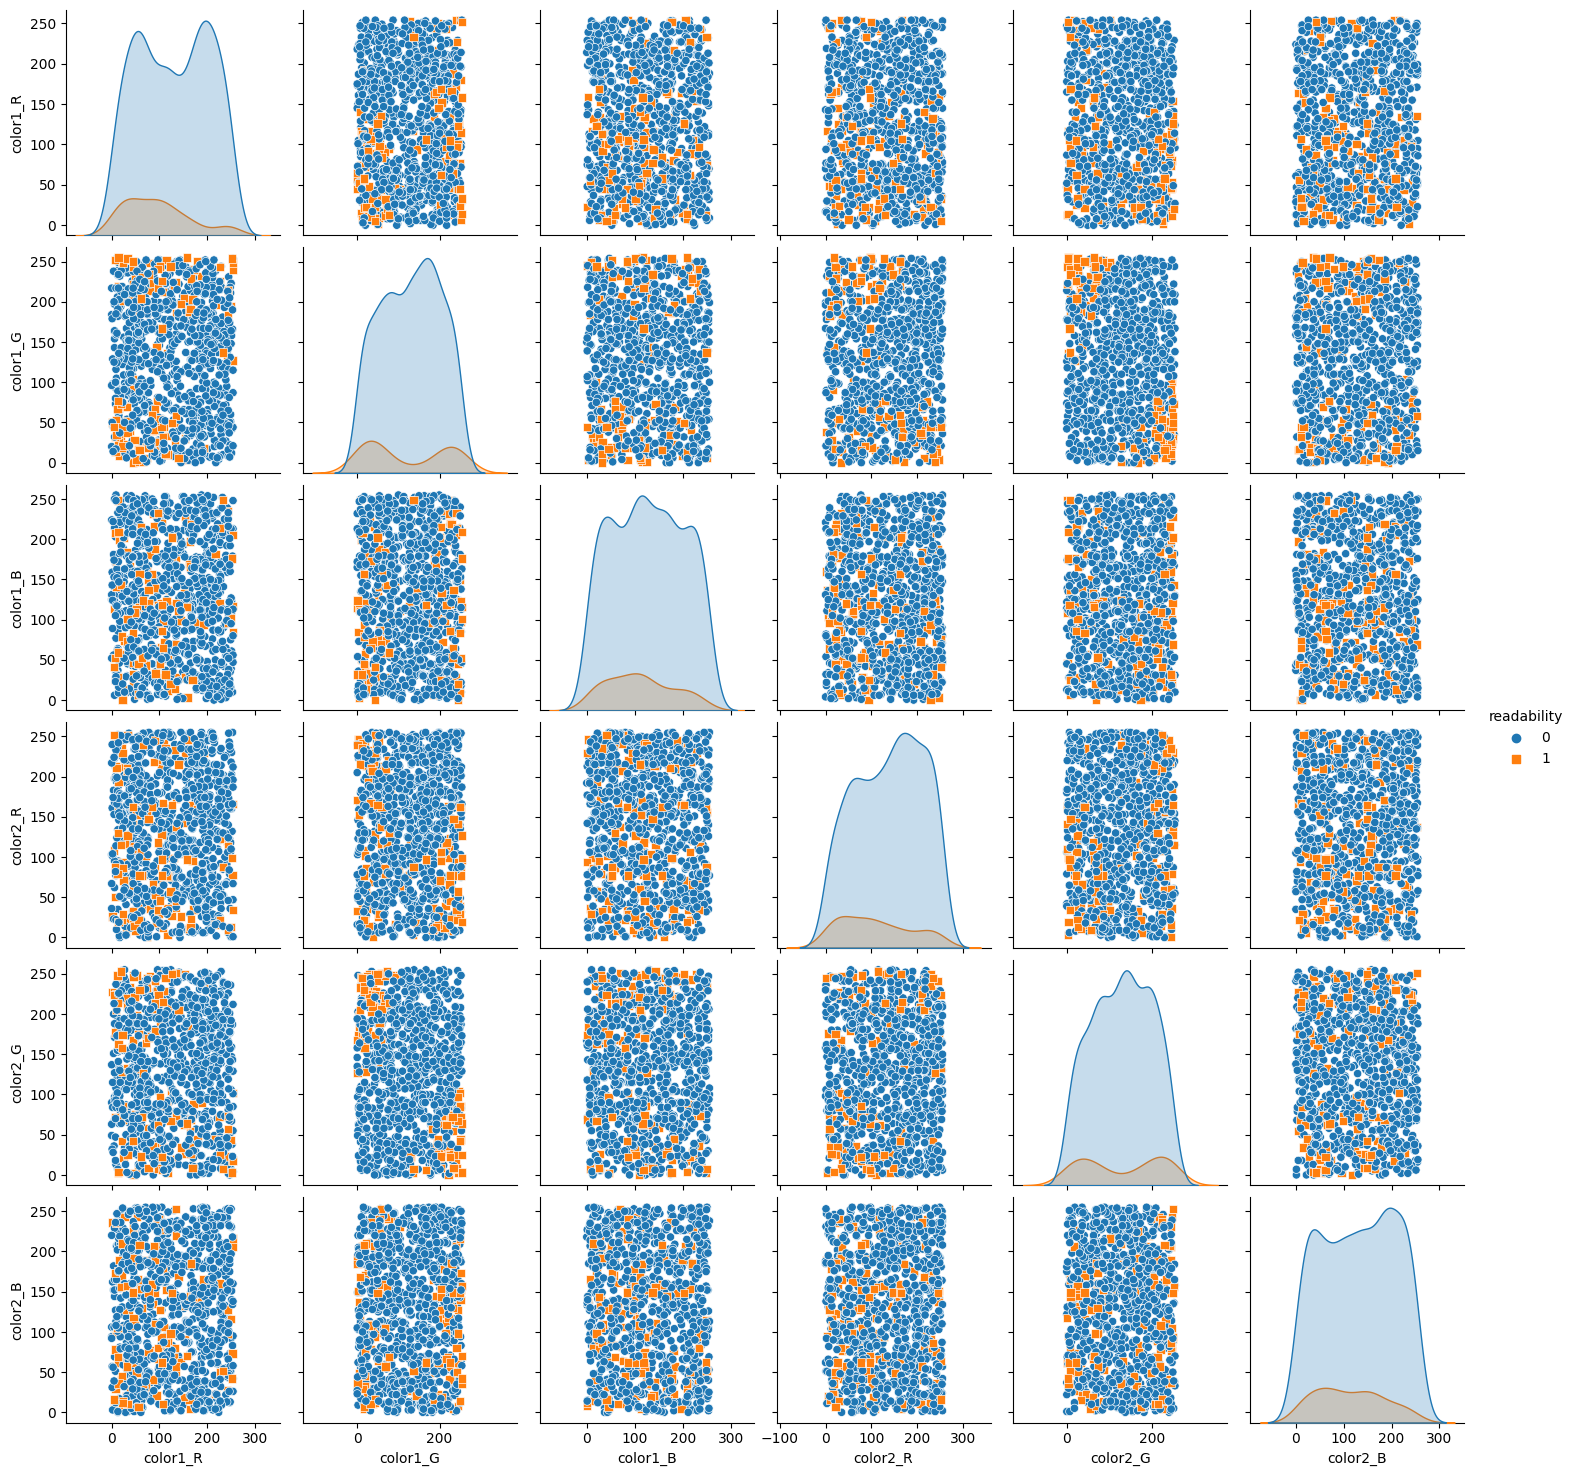

In [22]:
g = sns.pairplot(
    df,
    hue="readability",
    diag_kind="kde",
    markers=["o", "s"],
)
plt.show()

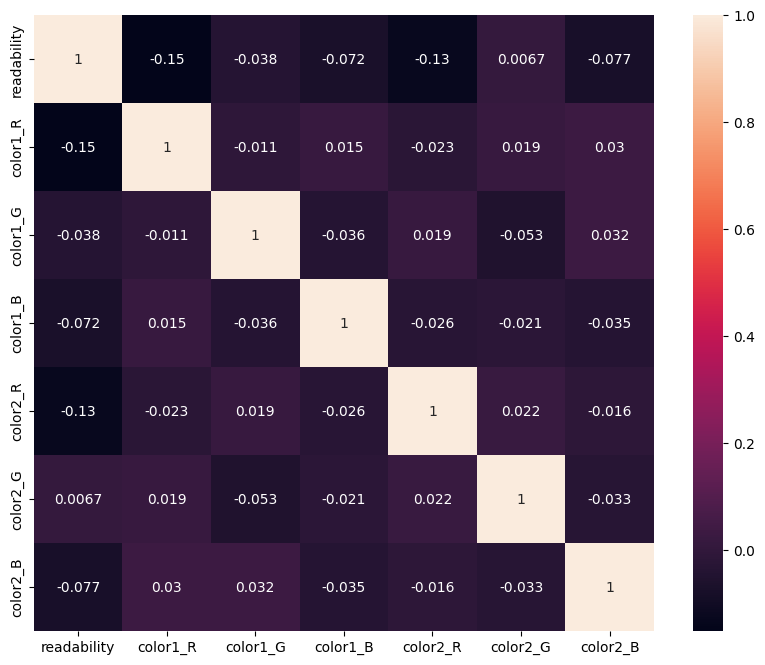

In [23]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df.corr(), annot=True)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop(["readability"], axis=1).values
y = df["readability"].values  

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def print_result(y_pred):
    print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.grid(False)
    plt.show()

              precision    recall  f1-score   support

          No       0.95      1.00      0.98       225
         Yes       1.00      0.56      0.72        25

    accuracy                           0.96       250
   macro avg       0.98      0.78      0.85       250
weighted avg       0.96      0.96      0.95       250



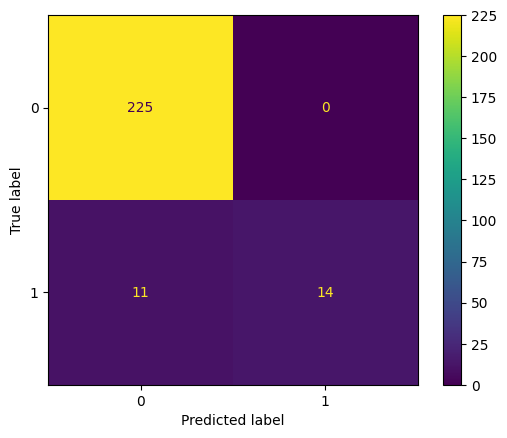

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred_RFC = RFC.predict(X_test)
print_result(y_pred_RFC)

              precision    recall  f1-score   support

          No       0.96      0.98      0.97       225
         Yes       0.75      0.60      0.67        25

    accuracy                           0.94       250
   macro avg       0.85      0.79      0.82       250
weighted avg       0.94      0.94      0.94       250



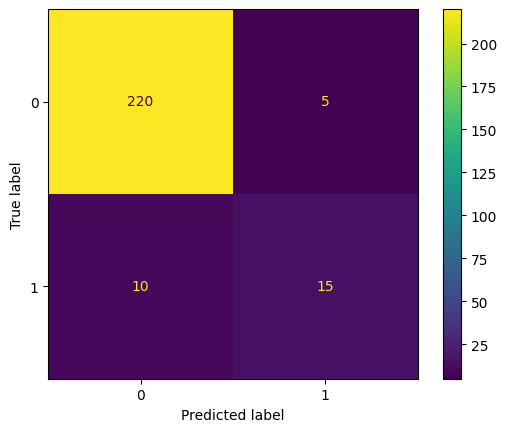

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
print_result(y_pred_KNN)

d:\Code\JavaScript\AI\Color-detection\model\v2\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Code\JavaScript\AI\Color-detection\model\v2\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Code\JavaScript\AI\Color-detection\model\v2\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

          No       0.90      1.00      0.95       225
         Yes       0.00      0.00      0.00        25

    accuracy                           0.90       250
   macro avg       0.45      0.50      0.47       250
weighted avg       0.81      0.90      0.85       250



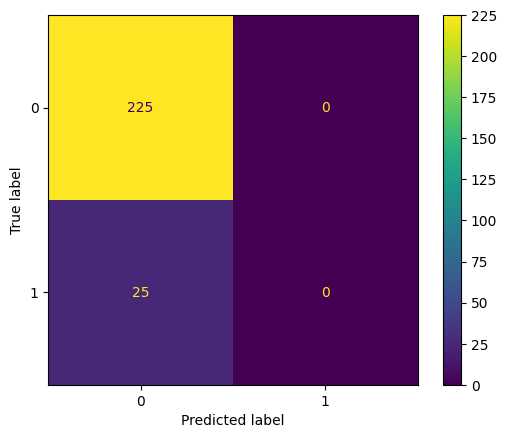

In [30]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNB = GNB.predict(X_test)
print_result(y_pred_GNB)

              precision    recall  f1-score   support

          No       0.96      1.00      0.98       225
         Yes       1.00      0.60      0.75        25

    accuracy                           0.96       250
   macro avg       0.98      0.80      0.86       250
weighted avg       0.96      0.96      0.96       250



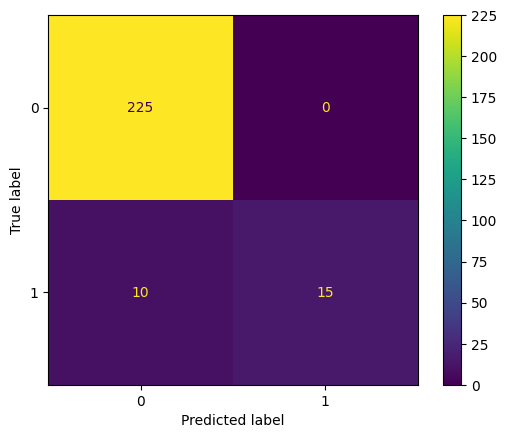

In [31]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
print_result(y_pred_SVM)

              precision    recall  f1-score   support

          No       0.98      0.99      0.99       225
         Yes       0.91      0.84      0.87        25

    accuracy                           0.98       250
   macro avg       0.95      0.92      0.93       250
weighted avg       0.98      0.98      0.98       250



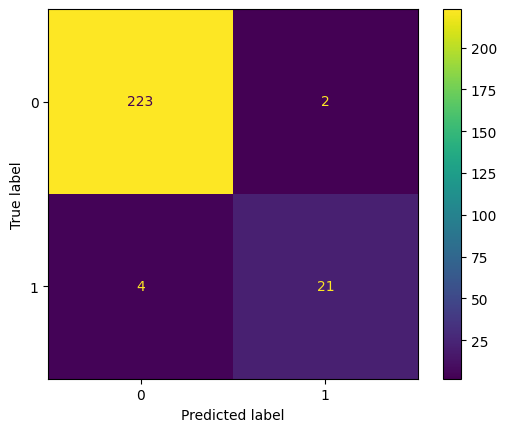

In [32]:
from sklearn import svm
SVM = svm.SVC(kernel="poly",degree=3)
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
print_result(y_pred_SVM)

In [33]:
import bz2
import joblib


def compressed_pickle(title, data):
    with bz2.BZ2File(f'./{title}.pickle', 'w') as f: 
        joblib.dump(data, f)

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = joblib.load(data)
    return data

In [34]:
compressed_pickle('model', SVM)

In [37]:
import numpy as np

In [54]:
x_input = np.array([2,12,45,225,111,231])
SVM.predict([x_input])[0]

1

In [61]:
def predict(model, c1, c2):
    r1, g1, b1 = hex2rgb(c1)
    r2, g2, b2 = hex2rgb(c2)
    x_input = np.array([r1, g1, b1, r2, g2, b2])
    return model.predict([x_input])[0]

In [67]:
model = decompress_pickle('model.pickle')
color1 = str(input())
color2 = str(input())
print(f"Model = {model}, Color 1: {color1}, Color 2: {color2}")

Model = SVC(kernel='poly'), Color 1: 8080FF, Color 2: FFFFFF


In [68]:
print(predict(model, color1, color2))

0
